# üéì Regress√£o Log√≠stica (LogisticRegression) - Com Imagens/ Fotos


Concluindo esta atividade voc√™ se tornar√° apto a ser um mestre Pokemon! Vamos ensinar o computador a reconhecer qual o tipo de cada Pokemon. 

<img src='https://tm.ibxk.com.br/2019/09/30/30091641838086.jpg?ims=1120x420' width=500>

Para esta atividade vamos focar apenas em tr√™s tipos, grama, fogo e √°gua. Fique a vontade para treinar o seu modelo para reconhecer mais tipos, assim voc√™ pode ganhar insignias nos gin√°sios com maior facilidade (o professor de voc√™s n√£o tem nada melhor para fazer mesmo...)

√â necess√°rio instalar algumas bibliotecas antes de executar a c√©lula abaixo com √™xito, busque na internet como fazer isso dependendo do erro que voc√™ obter.

In [1]:
!pip install opencv-python

In [2]:
# Importe aqui as bibliotecas necess√°rias
import pandas as pd
import numpy as np
import cv2
import os

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import Normalizer

import warnings
warnings.filterwarnings("ignore")

### 1) Carregue a base de dados com os metadados de todos os Pokemons

Coloque como √≠ndice a coluna `pokedex_number`, ela √© como o CPF de cada Pokemon.

In [3]:
dados = pd.read_csv('C:/Users/vinip/Downloads/pokemon.csv')
dados.set_index("pokedex_number", inplace = True)
dados

abilities  against_bug  against_dark  \
pokedex_number                                                           
1               ['Overgrow', 'Chlorophyll']         1.00           1.0   
2               ['Overgrow', 'Chlorophyll']         1.00           1.0   
3               ['Overgrow', 'Chlorophyll']         1.00           1.0   
4                  ['Blaze', 'Solar Power']         0.50           1.0   
5                  ['Blaze', 'Solar Power']         0.50           1.0   
...                                     ...          ...           ...   
797                         ['Beast Boost']         0.25           1.0   
798                         ['Beast Boost']         1.00           1.0   
799                         ['Beast Boost']         2.00           0.5   
800                         ['Prism Armor']         2.00           2.0   
801                          ['Soul-Heart']         0.25           0.5   

                against_dragon  against_electric  against_fairy  \
pokedex_number                                                    
1                          1.0               0.5            0.5   
2                          1.0               0.5            0.5   
3                          1.0               0.5            0.5   
4                          1.0               1.0            0.5   
5                          1.0               1.0            0.5   
...                        ...               ...            ...   
797                        0.5               2.0            0.5   
798                        0.5               0.5            0.5   
799                        2.0               0.5            4.0   
800                        1.0               1.0            1.0   
801                        0.0               1.0            0.5   

                against_fight  against_fire  against_flying  against_ghost  \
pokedex_number                                                               
1                         0.5           2.0             2.0            1.0   
2                         0.5           2.0             2.0            1.0   
3                         0.5           2.0             2.0            1.0   
4                         1.0           0.5             1.0            1.0   
5                         1.0           0.5             1.0            1.0   
...                       ...           ...             ...            ...   
797                       1.0           2.0             0.5            1.0   
798                       2.0           4.0             1.0            1.0   
799                       2.0           0.5             1.0            0.5   
800                       0.5           1.0             1.0            2.0   
801                       1.0           2.0             0.5            1.0   

                ...        name  percentage_male  sp_attack  sp_defense  \
pokedex_number  ...                                                       
1               ...   Bulbasaur             88.1         65          65   
2               ...     Ivysaur             88.1         80          80   
3               ...    Venusaur             88.1        122         120   
4               ...  Charmander             88.1         60          50   
5               ...  Charmeleon             88.1         80          65   
...             ...         ...              ...        ...         ...   
797             ...  Celesteela              NaN        107         101   
798             ...     Kartana              NaN         59          31   
799             ...    Guzzlord              NaN         97          53   
800             ...    Necrozma              NaN        127          89   
801             ...    Magearna              NaN        130         115   

                speed    type1   type2  weight_kg  generation  is_legendary  
pokedex_number                                                               
1                  45    grass  poison        6.9   

Veja aqui quais s√£o as colunas existentes.

In [4]:
dados.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'sp_attack', 'sp_defense',
       'speed', 'type1', 'type2', 'weight_kg', 'generation', 'is_legendary'],
      dtype='object')

Note que o tipo prim√°rio de cada pokemon √© chamado de `type1`. Mostre aqui os seus valores √∫nicos.

In [5]:
dados['type1'].unique()

array(['grass', 'fire', 'water', 'bug', 'normal', 'poison', 'electric',
       'ground', 'fairy', 'fighting', 'psychic', 'rock', 'ghost', 'ice',
       'dragon', 'dark', 'steel', 'flying'], dtype=object)

Crie um `DataFrame` com as colunas `type1` e `name` sendo a col√∫na √≠ndice o `pokedex_number`.

In [6]:
df = pd.DataFrame(dados['type1'], columns=['type1'])
df['name'] = dados['name']
df

type1        name
pokedex_number                     
1                 grass   Bulbasaur
2                 grass     Ivysaur
3                 grass    Venusaur
4                  fire  Charmander
5                  fire  Charmeleon
...                 ...         ...
797               steel  Celesteela
798               grass     Kartana
799                dark    Guzzlord
800             psychic    Necrozma
801               steel    Magearna

[801 rows x 2 columns]

### 2) Carregue a base de dados de imagens dos Pokemons

Use esta fun√ß√£o auxiliar para carregar a base de dados de imagens. Note que aqui usamos o OpenCV para ler as imagens, e tamb√©m fazer um pr√©-processamento. Aqui fazemos a verredura de um diret√≥rio inteiro lendo todos os seus arquivos!

In [7]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            img_256x256 =  cv2.resize(img, (256,256))
            images.append(cv2.cvtColor(img_256x256, cv2.COLOR_BGR2RGB))
    return images

Utilize a fun√ß√£o auxiliar e salve o resultado em uma lista chamada `imagens`. Ela √© uma lista de matrizes do numpy.

In [8]:
imagens = []
for x in range(801):
    img = load_images_from_folder('C:/Users/vinip/Downloads/Pokemon_Images/')[x]
    imagens.append(img)

Execute o bloco para testar se as imagens foram lidas corretamente. Aqui temos apenas uma amostragem de todas as imagens.

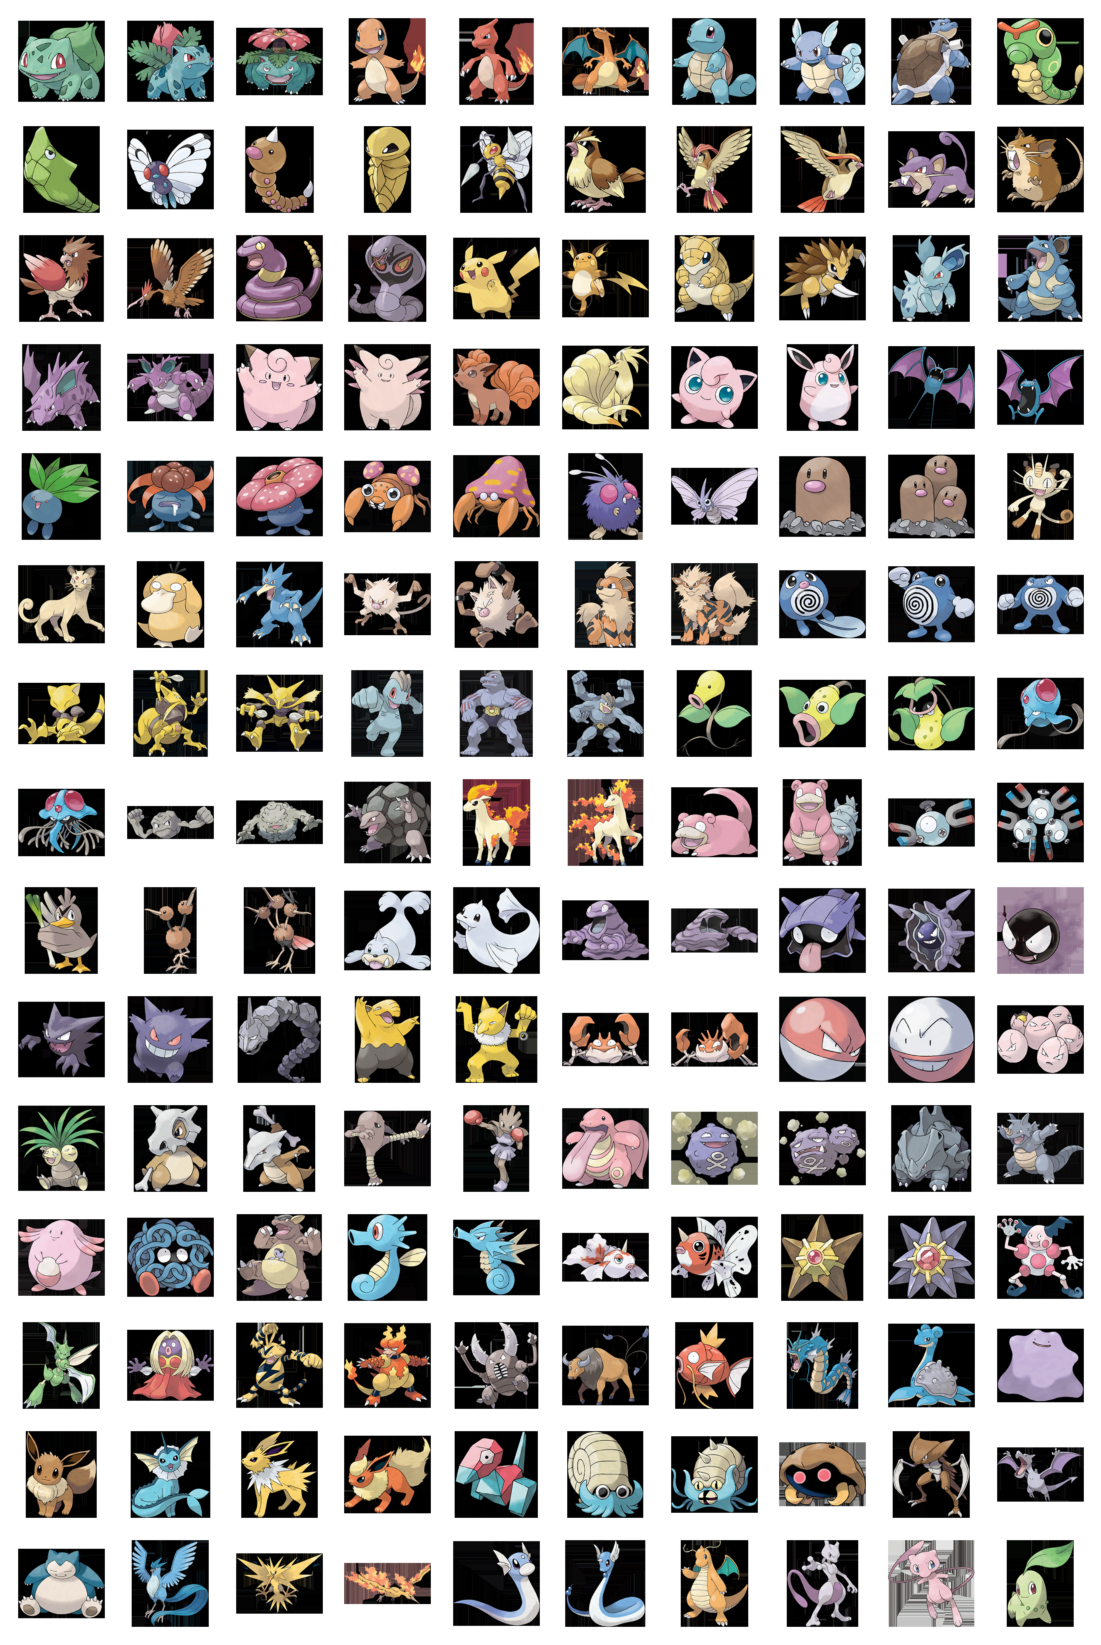

In [9]:
fig = plt.figure(figsize=(20,30))
grid = ImageGrid(fig,111,
                 nrows_ncols=(15, 10),  
                 axes_pad=0,  
                 )

for ax, im in zip(grid, imagens):
    ax.imshow(im)
    ax.axis('off')

plt.show()

Note que as imagens, que est√£o em `jpg` possuem um fundo preto circundando o Pokemon, al√©m de termos uma tarja branca nas fotos. Para a classifica√ß√£o vamos despresar estes valores que s√£o comuns em todas as fotos e n√£o servem para a classifica√ß√£o.

Substitua agora `img` que n√£o foi definida ainda, por alguma imagem que est√° na lista de imagens e fa√ßa um histograma para as cores da imagem. Note que no histograma eu n√£o coloquei as bordas (branco e preto) tente inclu√≠-las para ver o que acontece.

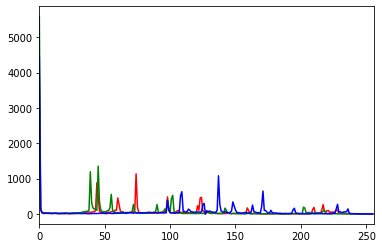

In [10]:
# Calcular o histograma para cada canal
colors = ('r','g','b')
# Para cada canal: calcular o histograma e adicionar √† lista de features
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([img], # Imagem
                            [i], # √çndice do canal
                            None, # Sem usar m√°scara
                            [256], # Tamanho do histograma
                            [1,255]) # Range - Removendo o preto e o branco para uma melhor visualiza√ß√£o!!!
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
plt.show()

### 3) Criando os Embeddings

Como j√° falamos em processamento de textos, √© poss√≠vel criar uma representa√ß√£o de algo complexo (um espa√ßo vetorial grande) em um menor que seja representativo. A isto damo o nome de Embeddings, que √© algo comum em aplica√ß√µes de Aprendizagem de m√°quina.

Use a fun√ß√£o auxiliar abaixo para a cria√ß√£o dos Embeddings das fotos dos Pokemons.

In [11]:
def embeddings(img):
    # Criar uma lista para o valor dos atributos
    features = []
    # Para cada canal: calcular o histograma e adicionar √† lista de features
    for i in range(3):
        histogram, bin_edges = np.histogram(
            img[:, :, i], bins=10, range=(1, 255) # remover o preto e o branco (coloquei s√≥ 10 bins para cada canal de cor)
        )
        features.append(histogram)

    # Criar um vetor para as features (concatena√ß√£o dos histogramas)
    return np.array(features).flatten().astype(int)

No c√≥digo abaixo eu apenas preenchi o esqueleto do DataFrame, preenchendo ele com zeros.

Coloque como coluna √≠ndice `pokedex_number` e sobreescreva cada linha com os embeddings para as cores.

In [12]:
df2 = pd.DataFrame(np.zeros((len(df),10*3)).astype(int)) # (coloquei s√≥ 10 bins para cada canal de cor)

In [13]:
ima = []
for x in range(801):
    img = embeddings(imagens[x])
    ima.append(img)

In [14]:
df2.update(ima)
df2 = df2.set_index(dados.index)

Agora acrescente uma coluna de `classe` e copie os valores de `type1` do primeiro DataFrame.

In [15]:
df2['classe'] = dados['type1']

Use o m√©todo `isin()` do Pandas para filtrar apenas as correspond√™ncias da lista abaixo em `df2`.

In [16]:
filtro = ['grass', 'fire', 'water']
df2 = df2[df2['classe'].isin(filtro)]
df2

0     1     2     3     4     5     6     7     8      9  \
pokedex_number                                                                 
1                1872  1146  2700  4821  7252  8790  1994   645   124  26990   
2                2696  1644  4101  6222  4600  4463   724   872   937  27274   
3                4188  1874  6233  3150  2070  1826   777  1621  2116  33615   
4                2300   491   713   504  1385  4035  1205  3085  3200  35830   
5                3078   522   692   484   797  4988  1913  3823  5040  32164   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
776              1576   348   553   966  1518  4312  2510  1207  2695  36456   
779              3426   525  1232  2137   911  1015  1097   568  4828  28883   
787              2210  2906  1431  1646   812  1108  7843  1509   897  33005   
788              6393  3192  2335  2901  1145  1297  1549  1487  1119  33049   
798             15159   596   862   715  1120  2619  2167  1456  2875  36620   

                ...    21    22    23    24    25    26    27    28     29  \
pokedex_number  ...                                                          
1               ...   751  2225  2506  4962  8346  6847  1834   118  27000   
2               ...   791  1777  1911  7163  2322  5084  5166   364  26730   
3               ...  1116  2752  3775  4043  4585  2183  1641   251  32983   
4               ...   874  5608  1924  7902  1443   691  1682  1663  28541   
5               ...   843  7609  4017  4257   950   745  1394   460  29800   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
776             ...   387  1948  2167  1267  1582  4739   942  1750  35804   
779             ...   627  1372  2736  2509  1209  2028   721  4797  25088   
787             ...  1621  1673  8219  3613  3925  1262   277   107  30599   
788             ...  4004  2774  2746  1942   777  1031  1118   872  32595   
798             ...   627  1264  1137  1617  2225  1909  1320  3612  35222   

                classe  
pokedex_number          
1                grass  
2                grass  
3                grass  
4                 fire  
5                 fire  
...                ...  
776               fire  
779              water  
787              grass  
788              water  
798              grass  

[244 rows x 31 columns]

Fa√ßa agora a fatoriza√ß√£o da coluna `classes` para transformar seus valores em categorias.

In [17]:
df2['classe'] = pd.factorize(df2['classe'])[0]
df2

0     1     2     3     4     5     6     7     8      9  \
pokedex_number                                                                 
1                1872  1146  2700  4821  7252  8790  1994   645   124  26990   
2                2696  1644  4101  6222  4600  4463   724   872   937  27274   
3                4188  1874  6233  3150  2070  1826   777  1621  2116  33615   
4                2300   491   713   504  1385  4035  1205  3085  3200  35830   
5                3078   522   692   484   797  4988  1913  3823  5040  32164   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
776              1576   348   553   966  1518  4312  2510  1207  2695  36456   
779              3426   525  1232  2137   911  1015  1097   568  4828  28883   
787              2210  2906  1431  1646   812  1108  7843  1509   897  33005   
788              6393  3192  2335  2901  1145  1297  1549  1487  1119  33049   
798             15159   596   862   715  1120  2619  2167  1456  2875  36620   

                ...    21    22    23    24    25    26    27    28     29  \
pokedex_number  ...                                                          
1               ...   751  2225  2506  4962  8346  6847  1834   118  27000   
2               ...   791  1777  1911  7163  2322  5084  5166   364  26730   
3               ...  1116  2752  3775  4043  4585  2183  1641   251  32983   
4               ...   874  5608  1924  7902  1443   691  1682  1663  28541   
5               ...   843  7609  4017  4257   950   745  1394   460  29800   
...             ...   ...   ...   ...   ...   ...   ...   ...   ...    ...   
776             ...   387  1948  2167  1267  1582  4739   942  1750  35804   
779             ...   627  1372  2736  2509  1209  2028   721  4797  25088   
787             ...  1621  1673  8219  3613  3925  1262   277   107  30599   
788             ...  4004  2774  2746  1942   777  1031  1118   872  32595   
798             ...   627  1264  1137  1617  2225  1909  1320  3612  35222   

                classe  
pokedex_number          
1                    0  
2                    0  
3                    0  
4                    1  
5                    1  
...                ...  
776                  1  
779                  2  
787                  0  
788                  2  
798                  0  

[244 rows x 31 columns]

Execute as c√©lulas abaixo para normalizar o DataFrame. N√£o use normaliza√ß√£o na coluna alvo.

In [18]:
transformer = Normalizer().fit(df2.drop('classe',axis=1))  
transformer

Normalizer()

In [19]:
df3 = pd.DataFrame(transformer.transform(df2.drop('classe',axis=1)) )
df3

0         1         2         3         4         5         6   \
0    0.036242  0.022187  0.052272  0.093335  0.140400  0.170175  0.038604   
1    0.053621  0.032698  0.081565  0.123750  0.091490  0.088765  0.014400   
2    0.070151  0.031390  0.104406  0.052764  0.034674  0.030586  0.013015   
3    0.040434  0.008632  0.012535  0.008860  0.024348  0.070936  0.021184   
4    0.055395  0.009394  0.012454  0.008711  0.014344  0.089769  0.034428   
..        ...       ...       ...       ...       ...       ...       ...   
239  0.024747  0.005464  0.008683  0.015169  0.023836  0.067709  0.039413   
240  0.070055  0.010735  0.025192  0.043698  0.018628  0.020755  0.022432   
241  0.038315  0.050382  0.024810  0.028537  0.014078  0.019210  0.135976   
242  0.108580  0.054214  0.039658  0.049271  0.019447  0.022029  0.026309   
243  0.223119  0.008772  0.012687  0.010524  0.016485  0.038548  0.031895   

           7         8         9   ...        20        21        22  \
0    0.012487  0.002401  0.522529  ...  0.034732  0.014539  0.043076   
1    0.017343  0.018636  0.542454  ...  0.048191  0.015732  0.035343   
2    0.027153  0.035444  0.563068  ...  0.069230  0.018694  0.046097   
3    0.054235  0.056256  0.629895  ...  0.039608  0.015365  0.098589   
4    0.068803  0.090705  0.578856  ...  0.057842  0.015171  0.136939   
..        ...       ...       ...  ...       ...       ...       ...   
239  0.018953  0.042318  0.572449  ...  0.026537  0.006077  0.030588   
240  0.011615  0.098723  0.590602  ...  0.099623  0.012821  0.028055   
241  0.026162  0.015551  0.572214  ...  0.040101  0.028104  0.029005   
242  0.025256  0.019005  0.561312  ...  0.112470  0.068005  0.047114   
243  0.021430  0.042316  0.538995  ...  0.211138  0.009229  0.018604   

           23        24        25        26        27        28        29  
0    0.048516  0.096065  0.161579  0.132559  0.035506  0.002284  0.522723  
1    0.038008  0.142465  0.046182  0.101116  0.102747  0.007240  0.531634  
2    0.063233  0.067722  0.076801  0.036566  0.027488  0.004204  0.552482  
3    0.033824  0.138918  0.025368  0.012148  0.029570  0.029236  0.501754  
4    0.072294  0.076613  0.017097  0.013408  0.025088  0.008279  0.536311  
..        ...       ...       ...       ...       ...       ...       ...  
239  0.034027  0.019895  0.024841  0.074414  0.014792  0.027479  0.562211  
240  0.055946  0.051304  0.024722  0.041469  0.014743  0.098090  0.513002  
241  0.142494  0.062639  0.068048  0.021880  0.004802  0.001855  0.530501  
242  0.046639  0.032983  0.013197  0.017511  0.018988  0.014810  0.553602  
243  0.016735  0.023800  0.032749  0.028098  0.019429  0.053164  0.518418  

[244 rows x 30 columns]

### 4) Divis√£o dos dados

Divida os dados em 20% para teste.

In [20]:
X = df3
y = df2['classe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Execute a c√©lula abaixo para conferir se a mesma propor√ß√£o de treino e teste foi respeitada:

In [21]:
aux1 = y_train.value_counts().sort_values(ascending=False)
aux2 = y_test.value_counts().sort_values(ascending=False)

aux1 = aux1/sum(aux1) * 100
aux2 = aux2/sum(aux2) * 100

# Imprir de forma tabelada para compara√ß√£o
pd.concat([aux1, aux2], axis=1)

classe     classe
2  46.153846  48.979592
0  31.282051  34.693878
1  22.564103  16.326531

Podemos confirmar que cada conjunto de dados tem uma distribui√ß√£o semelhante de classes, portanto, ao treinar a regress√£o log√≠stica, poderemos generalizar e reduzir o risco de overfitting aos dados de treinamento! 

### 5) Fa√ßa agora a valida√ß√£o cruzada

Para melhorar a performance do seu modelo fa√ßa a valida√ß√£o cruzada com 5 folds e use um limite de 1000 itera√ß√µes.

In [22]:
logregCV = LogisticRegressionCV(max_iter=1000, cv=5).fit(X_train, y_train)

In [23]:
y_pred = logregCV.predict(X_test)

Veja agora qu√£o bom ficou o seu modelo com o `classification_report`.

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.00      0.00      0.00         8
           2       0.49      1.00      0.66        24

    accuracy                           0.49        49
   macro avg       0.16      0.33      0.22        49
weighted avg       0.24      0.49      0.32        49



Parab√©ns, voc√™ ensinou ao computador a identificar Pokemons de √°gua, fogo e grama! 